1: Cargar y Preprocesar los Datos

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import os 
os.chdir("/Users/gilgu/OneDrive/Escritorio")


# Cargar datos
data = pd.read_csv('Employee Attrition Data.csv')  

In [2]:
data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


In [3]:
# Visualizar las primeras filas
print(data.head())

   Employee ID  Age Gender  Years at Company    Job Role  Monthly Income  \
0        52685   36   Male                13  Healthcare            8029   
1        30585   35   Male                 7   Education            4563   
2        54656   50   Male                 7   Education            5583   
3        33442   58   Male                44       Media            5525   
4        15667   39   Male                24   Education            4604   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent             High            Average                     1   
1              Good             High            Average                     1   
2              Fair             High            Average                     3   
3              Fair        Very High               High                     0   
4              Good             High            Average                     0   

   ... Number of Dependents  Job Level Company Size Comp

In [4]:
# Identificar y tratar valores nulos
print(data.isnull().sum())
data = data.dropna()  # Si hay pocos nulos, eliminarlos; si no, considerar imputarlos

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64


In [5]:
# Codificar variables categóricas
encoder = LabelEncoder()
data['Attrition'] = encoder.fit_transform(data['Attrition'])  # Asegurar que "Attrition" esté codificado como 0 (Stayed) o 1 (Left)

In [6]:
# Variables predictoras y variable objetivo
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [7]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

2: Análisis Exploratorio de Datos (EDA)

In [8]:
# Para identificar patrones en la rotación, se visualiza la distribución de algunas variables clave.
import seaborn as sns
import matplotlib.pyplot as plt

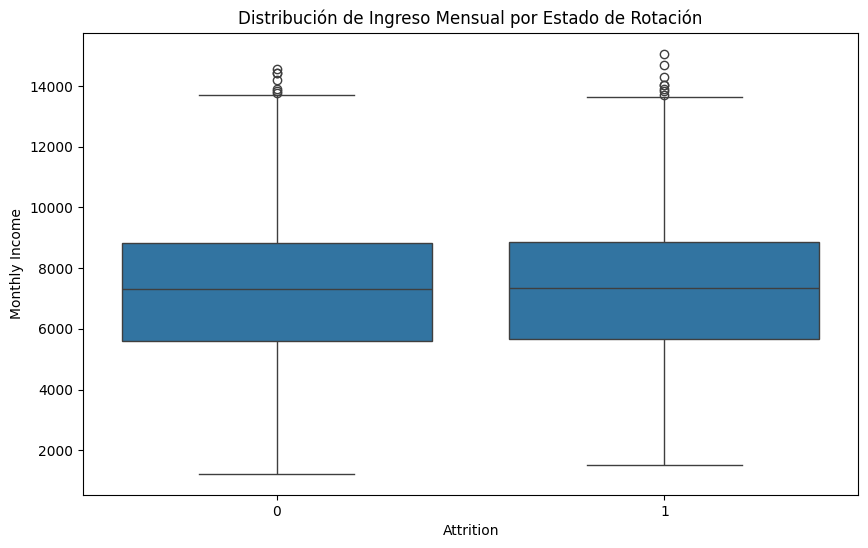

In [10]:
# Relación entre "Monthly Income" y "Attrition"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Monthly Income', data=data)
plt.title('Distribución de Ingreso Mensual por Estado de Rotación')
plt.show()


In [11]:
print(data.columns)

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')


In [17]:
# Selecciona solo las columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [18]:
# Calcula la matriz de correlación
correlation_matrix = numeric_data.corr()

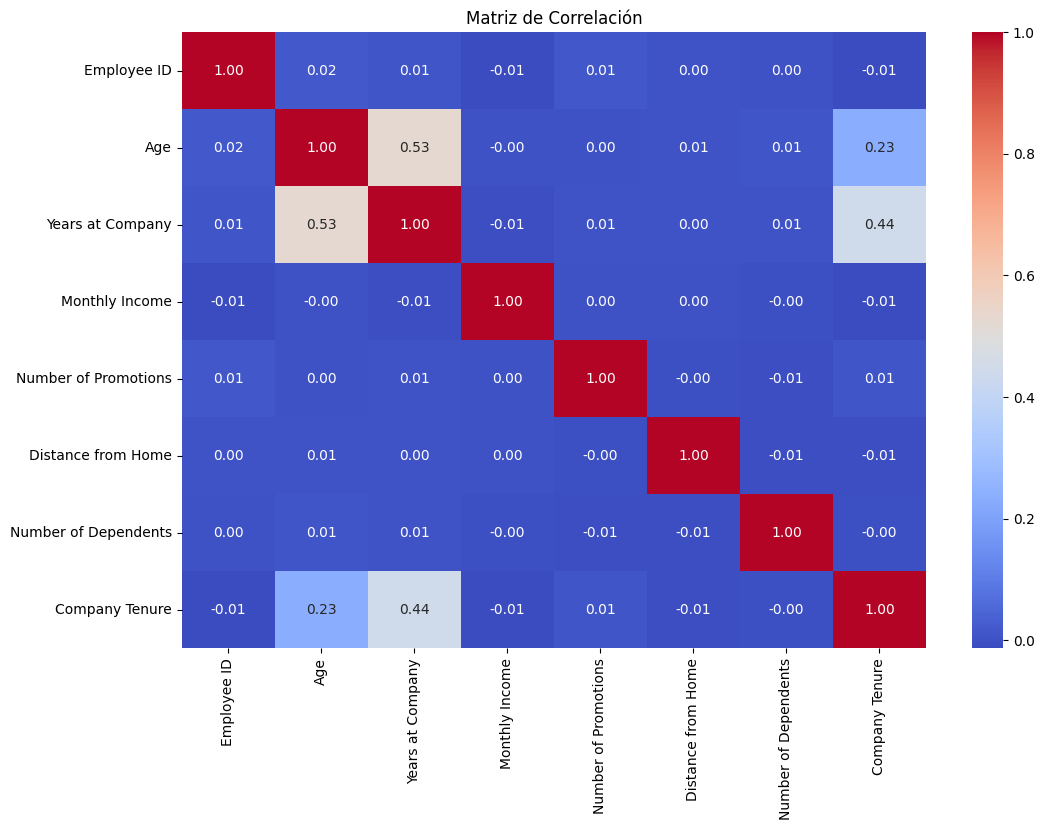

In [19]:
# Genera el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

3: Selección y Construcción de Modelos

1. Regresión Logística

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Convertir variables categóricas en variables dummy (one-hot encoding)
data = pd.get_dummies(data)

In [12]:
# Dividir el conjunto de datos
X = data.drop('Attrition', axis=1)  # Asegúrate de que 'Attrition' sea el nombre de tu columna objetivo
y = data['Attrition']

In [13]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [16]:
# Reducir la dimensionalidad para visualizar los datos (PCA a 2D)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [17]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test_scaled)

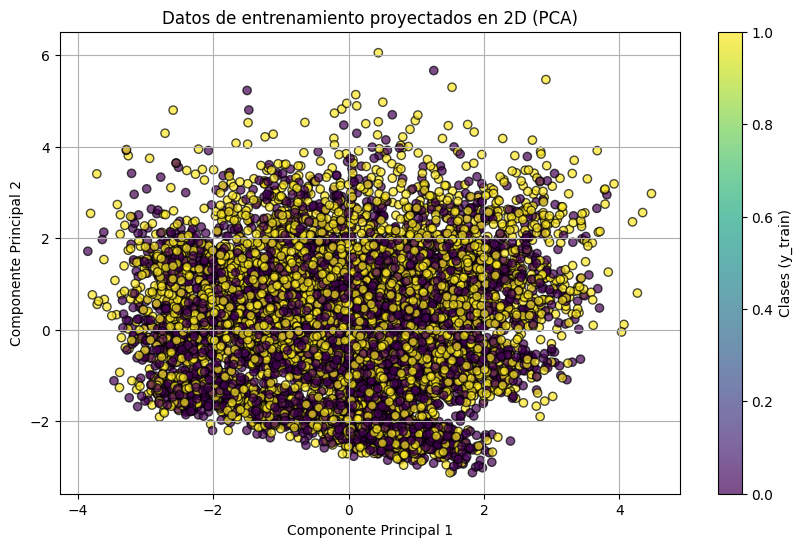

In [18]:
# Visualizar los datos de entrenamiento
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7, edgecolors='k')
plt.colorbar(scatter, label='Clases (y_train)')
plt.title("Datos de entrenamiento proyectados en 2D (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid()
plt.show()

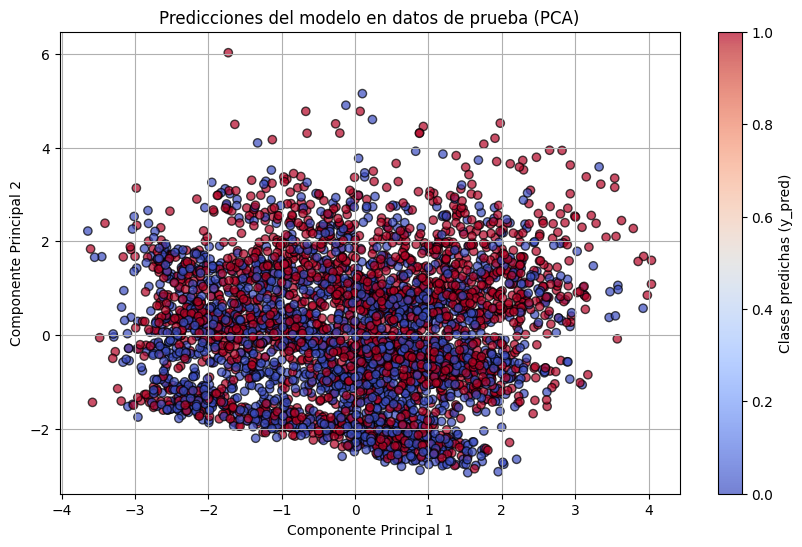

In [19]:
# Visualizar los datos de prueba con predicciones
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='coolwarm', alpha=0.7, edgecolors='k')
plt.colorbar(scatter, label='Clases predichas (y_pred)')
plt.title("Predicciones del modelo en datos de prueba (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid()
plt.show()

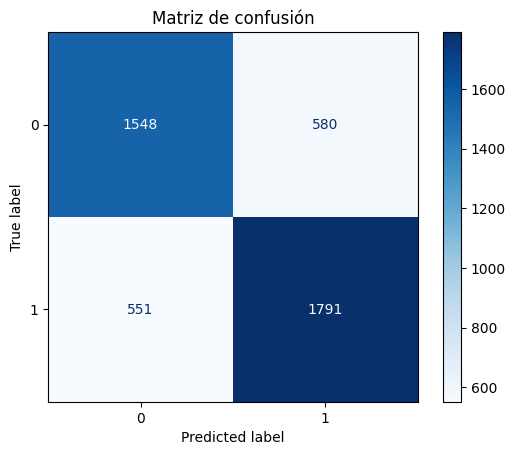

In [20]:
# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='Blues')
plt.title("Matriz de confusión")
plt.show()


2. Bosques Aleatorios (Random Forest)

Iniciando ajuste del modelo...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Ajuste completado.
Mejores Hiperparámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Mejor Puntuación de Precisión: 0.7451581975071908


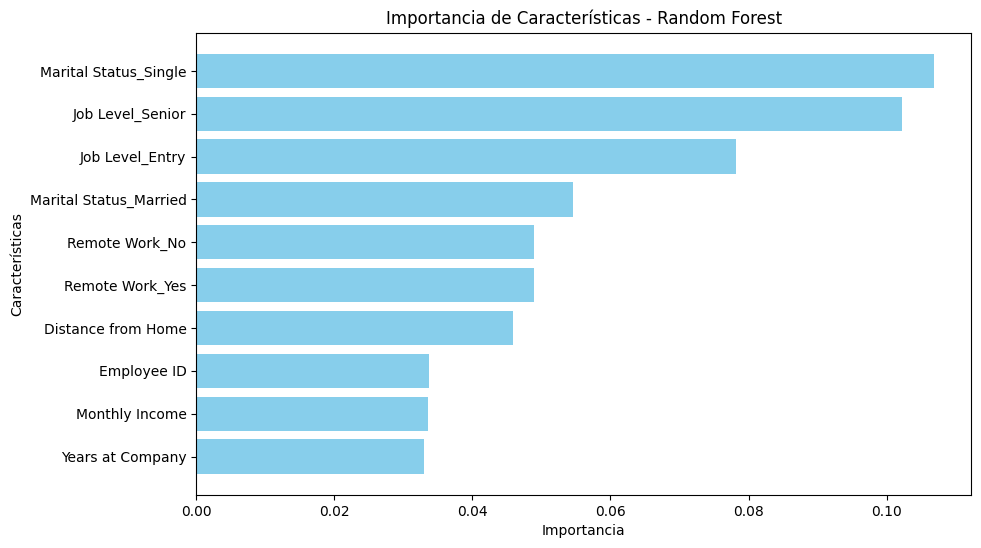

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Verifica los datos de entrada
if 'X_train' in locals() and 'y_train' in locals() and X_train is not None and y_train is not None:
    # Definir el modelo Random Forest
    rf_model = RandomForestClassifier(random_state=42)
    
    # Parámetros para el ajuste del modelo Random Forest
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    # Configuración de GridSearchCV
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
    
    # Ajustar el modelo
    print("Iniciando ajuste del modelo...")
    grid_search.fit(X_train, y_train)
    print("Ajuste completado.")

    # Mejor modelo
    best_rf_model = grid_search.best_estimator_
    print("Mejores Hiperparámetros:", grid_search.best_params_)
    print("Mejor Puntuación de Precisión:", grid_search.best_score_)

    # Generar la gráfica de importancia de características
    if hasattr(best_rf_model, "feature_importances_"):
        feature_importances = best_rf_model.feature_importances_
        indices = np.argsort(feature_importances)[::-1]

        # Si X_train es un DataFrame de Pandas, obtiene nombres de columnas
        feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

        # Ordenar las características
        sorted_features = [feature_names[i] for i in indices]
        sorted_importances = feature_importances[indices]

        # Crear la gráfica
        plt.figure(figsize=(10, 6))
        plt.barh(sorted_features[:10], sorted_importances[:10], color='skyblue')
        plt.gca().invert_yaxis()
        plt.xlabel('Importancia')
        plt.ylabel('Características')
        plt.title('Importancia de Características - Random Forest')
        plt.show()
    else:
        print("El modelo no tiene un atributo 'feature_importances_'. Asegúrate de que sea un Random Forest.")
else:
    print("X_train o y_train no están definidos o están vacíos.")

    


    

4: Evaluación y Ajuste de Hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parámetros para ajuste de Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_rf_model = grid_search.best_estimator_
print("Mejores Hiperparámetros:", grid_search.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Parámetros para el ajuste del modelo Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Configuración de GridSearchCV con salida en verbose
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Mensaje de inicio
print("Iniciando GridSearchCV...")

# Realizar el ajuste del GridSearchCV
grid_search.fit(X_train, y_train)

# Mensaje de finalización
print("GridSearchCV completado")

# Mostrar el mejor modelo y los mejores hiperparámetros
best_rf_model = grid_search.best_estimator_
print("Mejores Hiperparámetros:", grid_search.best_params_)
print("Mejor Puntuación de Precisión:", grid_search.best_score_)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Parámetros para el ajuste del modelo Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Configuración de GridSearchCV con salida en verbose
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Mensaje de inicio
print("Iniciando GridSearchCV...")

# Verifica que los datos de entrenamiento no estén vacíos
if X_train is not None and y_train is not None and len(X_train) > 0 and len(y_train) > 0:
    try:
        # Realizar el ajuste del GridSearchCV
        grid_search.fit(X_train, y_train)

        # Mensaje de finalización
        print("GridSearchCV completado")

        # Mostrar el mejor modelo y los mejores hiperparámetros
        best_rf_model = grid_search.best_estimator_
        print("Mejores Hiperparámetros:", grid_search.best_params_)
        print("Mejor Puntuación de Precisión:", grid_search.best_score_)
    except Exception as e:
        print("Se produjo un error durante el ajuste del modelo:", e)
else:
    print("Los datos de entrenamiento están vacíos o no están definidos.")


5: Evaluación de los Modelos

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve

# Evaluación de Regresión Logística
y_pred_logistic = logistic_model.predict(X_test_scaled)
print("Precisión Regresión Logística:", accuracy_score(y_test, y_pred_logistic))
print("Sensibilidad Regresión Logística:", recall_score(y_test, y_pred_logistic))
print("ROC AUC Logística:", roc_auc_score(y_test, y_pred_logistic))

NameError: name 'logistic_model' is not defined

In [ ]:
# Evaluación de Random Forest
y_pred_rf = best_rf_model.predict(X_test)
print("Precisión Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Sensibilidad Random Forest:", recall_score(y_test, y_pred_rf))
print("ROC AUC Random Forest:", roc_auc_score(y_test, y_pred_rf))

In [ ]:
# Matriz de confusión para Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

6: Análisis de Importancia de Características

In [ ]:
# Importancia de características en el modelo de Random Forest
feature_importances = best_rf_model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Característica': features, 'Importancia': feature_importances})
feature_df = feature_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Característica', data=feature_df)
plt.title('Importancia de Características en el Modelo Random Forest')
plt.show()

Iniciando ajuste del modelo...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Ajuste completado.
Mejores Hiperparámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Mejor Puntuación de Precisión: 0.7451581975071908


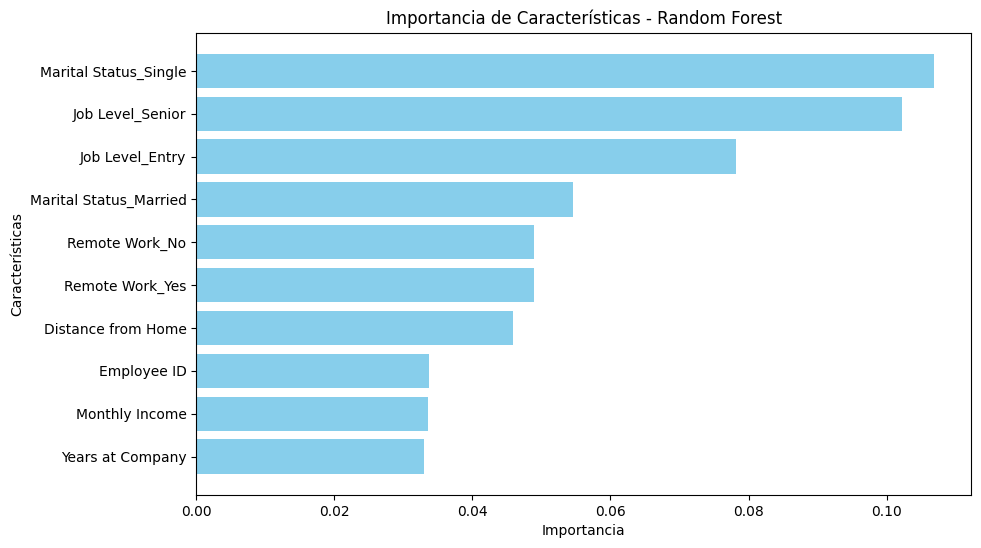

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Verifica los datos de entrada
if 'X_train' in locals() and 'y_train' in locals() and X_train is not None and y_train is not None:
    # Definir el modelo Random Forest
    rf_model = RandomForestClassifier(random_state=42)
    
    # Parámetros para el ajuste del modelo Random Forest
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    # Configuración de GridSearchCV
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
    
    # Ajustar el modelo
    print("Iniciando ajuste del modelo...")
    grid_search.fit(X_train, y_train)
    print("Ajuste completado.")

    # Mejor modelo
    best_rf_model = grid_search.best_estimator_
    print("Mejores Hiperparámetros:", grid_search.best_params_)
    print("Mejor Puntuación de Precisión:", grid_search.best_score_)

    # Generar la gráfica de importancia de características
    if hasattr(best_rf_model, "feature_importances_"):
        feature_importances = best_rf_model.feature_importances_
        indices = np.argsort(feature_importances)[::-1]

        # Si X_train es un DataFrame de Pandas, obtiene nombres de columnas
        feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

        # Ordenar las características
        sorted_features = [feature_names[i] for i in indices]
        sorted_importances = feature_importances[indices]

        # Crear la gráfica
        plt.figure(figsize=(10, 6))
        plt.barh(sorted_features[:10], sorted_importances[:10], color='skyblue')
        plt.gca().invert_yaxis()
        plt.xlabel('Importancia')
        plt.ylabel('Características')
        plt.title('Importancia de Características - Random Forest')
        plt.show()
    else:
        print("El modelo no tiene un atributo 'feature_importances_'. Asegúrate de que sea un Random Forest.")
else:
    print("X_train o y_train no están definidos o están vacíos.")